In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("https://github.com/611noorsaeed/100-days-Scikit-Learn-Tutorials-/raw/refs/heads/main/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df["Gender"]=df["Gender"].map({"Male":0,"Female":1})

In [8]:
x=df[["Gender","Age","EstimatedSalary"]]
y=df["Purchased"]
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

### Train Test split

In [9]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [42]:
x_train.shape

(280, 3)

In [43]:
x_test.shape

(120, 3)

In [44]:
y_train.shape

(280,)

In [45]:
y_test.shape

(120,)

### Standardization

In [55]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [56]:
x_train_scaled=pd.DataFrame(data=x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(data=x_test_scaled,columns=x_test.columns)

In [59]:
np.round(x_train_scaled.describe(),2)

,Gender,Age,EstimatedSalary
count,280.00,280.00,280.00
mean,0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-1.02,-1.92,-1.64
25%,-1.02,-0.74,-0.78
50%,0.98,-0.06,0.01
75%,0.98,0.73,0.51
max,0.98,2.20,2.34


In [58]:
x_train.describe()

,Gender,Age,EstimatedSalary
count,280.000000,280.000000,280.000000
mean,0.510714,37.575000,70589.285714
std,0.500780,10.196005,33948.504534
min,0.000000,18.000000,15000.000000
25%,0.000000,30.000000,44000.000000
50%,1.000000,37.000000,71000.000000
75%,1.000000,45.000000,88000.000000
max,1.000000,60.000000,150000.000000


Text(0, 0.5, 'Salary')

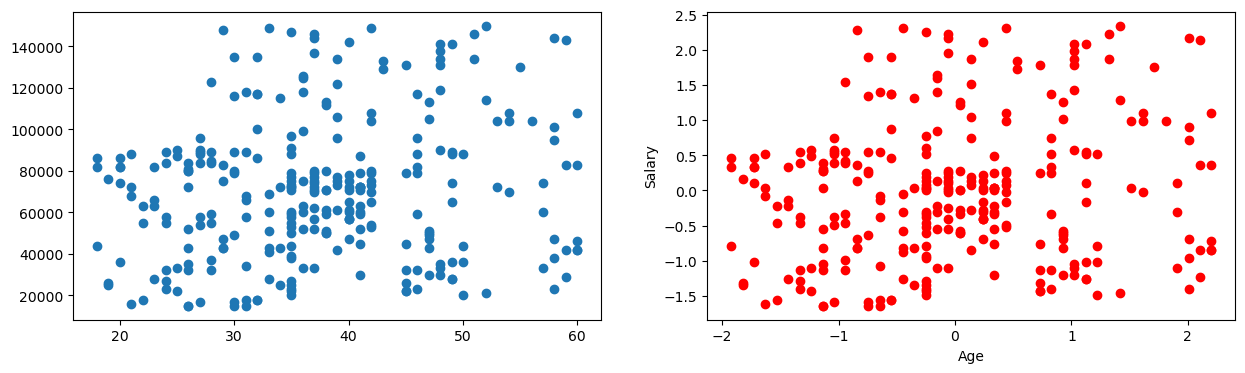

In [78]:
fig,(x1,x2) = plt.subplots(1,2,figsize=(15,4))
x1.scatter(x_train['Age'],x_train["EstimatedSalary"])
x2.scatter(x_train_scaled['Age'],x_train_scaled["EstimatedSalary"],color="red")
plt.xlabel("Age")
plt.ylabel("Salary")